## Work environment

In [1]:
# Import libraries
import os
import numpy as np
import pm4py
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.data.functions_preprocessing_data import load_data, extract_meta_data, create_traces
from src.data.functions_exploration_data import descriptive_statistics, check_nan_traces
from src.visualization.functions_exploration_visualize import plot_histogram_trace_length, plot_histogram_activity_occurrence, plot_heatmap, plot_bpmn_map, plot_petri_net, plot_dfg

print("Libraries loaded.")

Libraries loaded.


In [2]:
# Change working directory
# working_directory = 'c:/Users/Steph/OneDrive - Universität Bayreuth/Masterarbeit/03_Programmierung/remaining_trace_prediction_master_thesis_stephan_faatz'
working_directory = '/home/jupyter-sfaatz/'
os.chdir(working_directory)
print("Working directory: ", os.getcwd())

Working directory:  /home/jupyter-sfaatz


## Parameter

In [3]:
# Set path variables
path_raw = 'data/raw/'

# Set features
features = ['concept:name', 'org:resource']

### Functions

Naming Scheme:
- timestamp = time:timestamp
- concept:name = Activity ID
- case:concept:name = Case ID
- org:resource = Resource

## Dataset

In [4]:
# Load the dataset
data = load_data(path_raw + 'helpdesk.csv',['Complete Timestamp', 'Case ID', 'Activity', 'Resource'])

In [5]:
print(data.head(15))

          time:timestamp case:concept:name           concept:name org:resource
0    2012-10-09 14:50:17            Case 1     Assign seriousness      Value 1
1    2012-10-09 14:51:01            Case 1  Take in charge ticket      Value 1
2    2012-10-12 15:02:56            Case 1  Take in charge ticket      Value 2
3    2012-10-25 11:54:26            Case 1         Resolve ticket      Value 1
4    2012-11-09 12:54:39            Case 1                 Closed      Value 3
42   2010-02-10 08:50:20           Case 10     Assign seriousness      Value 2
43   2010-03-19 08:47:06           Case 10  Take in charge ticket      Value 2
44   2010-03-19 08:47:13           Case 10         Resolve ticket      Value 2
45   2010-04-03 07:47:38           Case 10                 Closed      Value 5
451  2013-04-12 10:25:17          Case 100     Assign seriousness      Value 1
452  2013-04-24 10:24:01          Case 100  Take in charge ticket      Value 9
453  2013-04-24 15:51:11          Case 100        Re

### Explore Dataset

In [6]:
# Calculate descriptive statistics
descriptive_statistics(data, features)

Number of activites:           21348
Number of resources:           21348
Unique activites:              36
Unique resources:              22
Number of cases:               4580
Unique processes:              226
Maximum case length:           15
Minimum case length:           2
Average case length:           4.66
99.99% percentile:             14.542099999999664
99.00% percentile:             9.0
95.00% percentile:             7.0
75.00% percentile:             5.0
50.00% percentile:             4.0
25.00% percentile:             4.0
concept:name nan values:        0
org:resource nan values:        0
Variance of occurence counts:  26527.315870206494
Variance in process:           25.130576903828306


In [7]:
# Check for nan traces
check_nan_traces(data, features)

Processing Arrays: 100%|██████████| 4580/4580 [00:00<00:00, 1451557.53it/s]



No NaN values have been detected.


### Plots

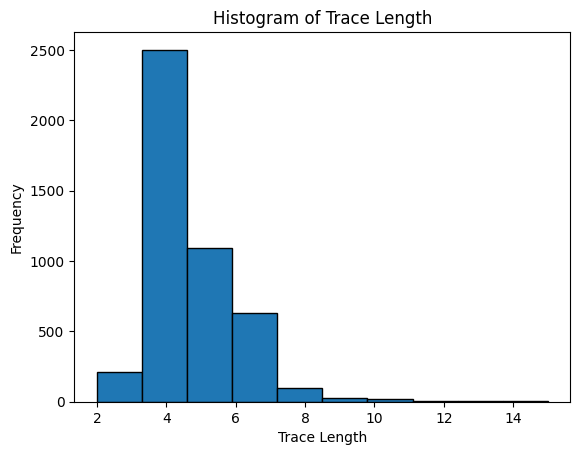

In [8]:
# Plot histogram of trace length
plot_histogram_trace_length(data)

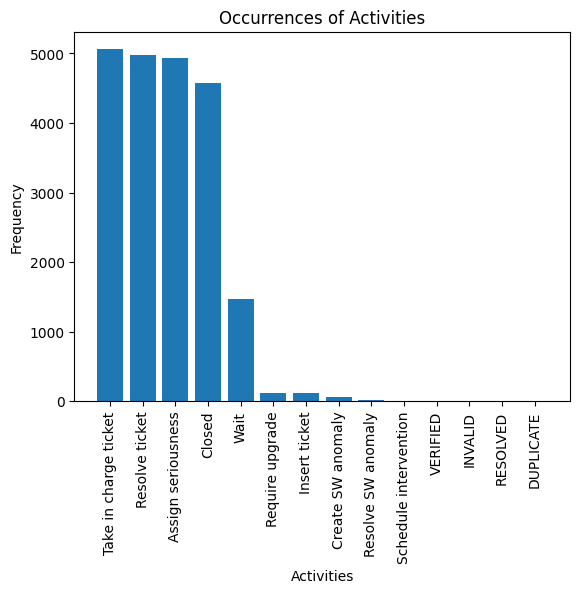

In [9]:
# Plot the occurence of activites
plot_histogram_activity_occurrence(data)

Generating heatmap data: 100%|██████████| 4580/4580 [00:00<00:00, 31368.70it/s]


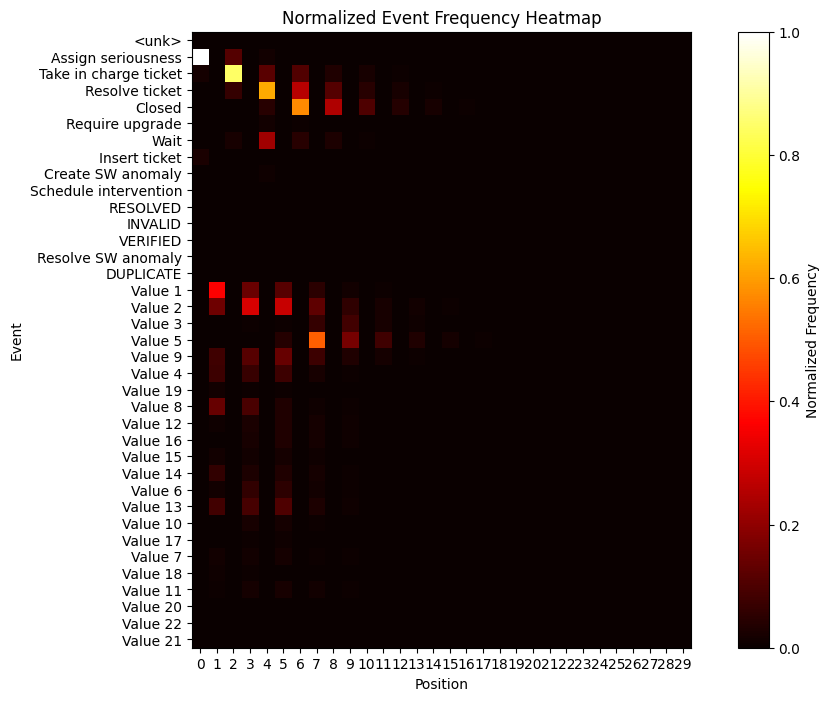

In [10]:
# Plot probabilty of activity with regard to the sequence postition
plot_heatmap(data, features)

### Process Mining Plots

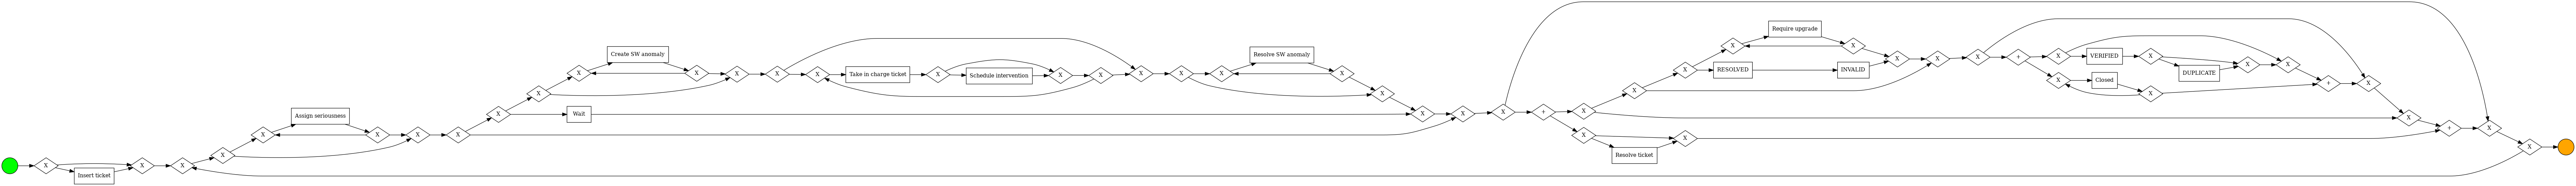

In [11]:
# Plot BPMN map
bpmn_map = plot_bpmn_map(data)

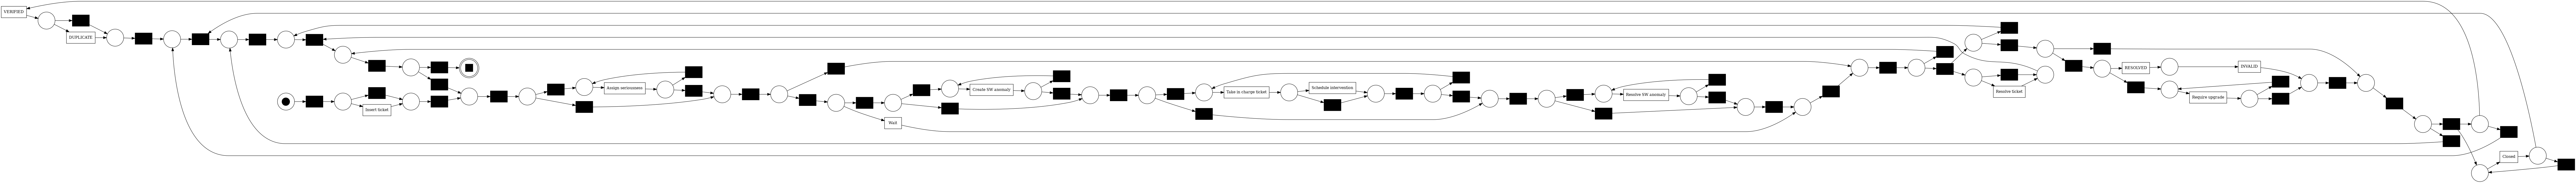

In [12]:
# Plot petri net
net, im, fm = plot_petri_net(bpmn_map)

/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


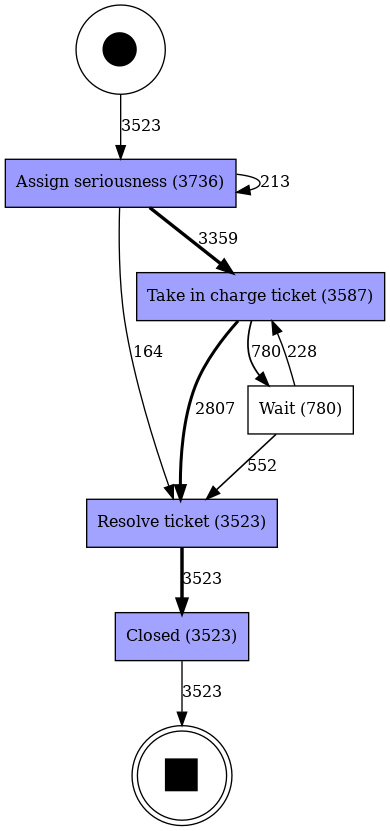

In [13]:
# Plot directly follows graph
dfg, start_activities, end_activities = plot_dfg(data, num_variants = 5)

## BPI Challenge 2012

In [14]:
# Load dataset
data = load_data(path_raw + 'BPI_Challenge_2012.xes.gz',['time:timestamp','case:concept:name','concept:name', 'org:resource'])

/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 13087/13087 [00:07<00:00, 1717.37it/s]
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Cou

In [15]:
print(data)

                         time:timestamp case:concept:name  \
0      2011-09-30 22:38:44.546000+00:00            173688   
1      2011-09-30 22:38:44.880000+00:00            173688   
2      2011-09-30 22:39:37.906000+00:00            173688   
3      2011-09-30 22:39:38.875000+00:00            173688   
4      2011-10-01 09:36:46.437000+00:00            173688   
...                                 ...               ...   
262195 2012-02-29 22:51:17.423000+00:00            214376   
262196 2012-02-29 22:52:01.287000+00:00            214376   
262197 2012-03-01 08:26:46.736000+00:00            214376   
262198 2012-03-01 08:27:37.118000+00:00            214376   
262199 2012-03-01 08:27:41.325000+00:00            214376   

                  concept:name org:resource  
0                  A_SUBMITTED          112  
1            A_PARTLYSUBMITTED          112  
2                A_PREACCEPTED          112  
3       W_Completeren aanvraag          112  
4       W_Completeren aanvraag       

### Explore the dataset

In [16]:
# Calculate descriptive statistics
descriptive_statistics(data, features)

Number of activites:           262200
Number of resources:           244190
Unique activites:              92
Unique resources:              68
Number of cases:               13087
Unique processes:              4366
Maximum case length:           175
Minimum case length:           3
Average case length:           20.04
99.99% percentile:             169.07419999999365
99.00% percentile:             85.0
95.00% percentile:             58.0
75.00% percentile:             31.0
50.00% percentile:             11.0
25.00% percentile:             3.0
concept:name nan values:        0
org:resource nan values:        18010
Variance of occurence counts:  3543.080176926883
Variance in process:           39.69569239531897


Processing Arrays: 100%|██████████| 13087/13087 [00:00<00:00, 829317.35it/s]



num_traces:           13087
num_traces_with_nan:  3528
num_nan:              [ 5. 12.  6. ...  0.  0.  0.]
Average of nan per trace:  5.104875283446712


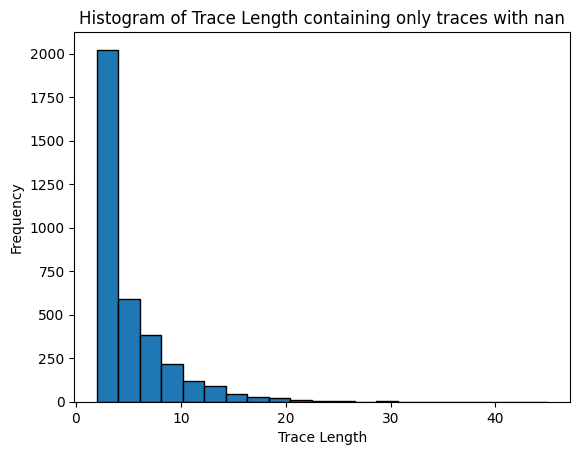

In [17]:
# Check for nan traces
check_nan_traces(data, features)

### Plots

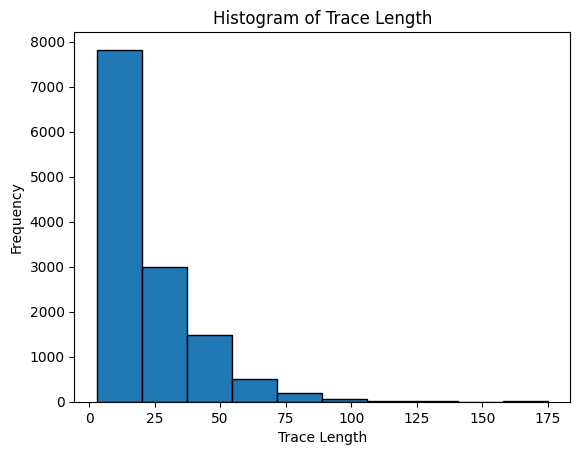

In [18]:
# Plot histogram of trace length 
plot_histogram_trace_length(data)

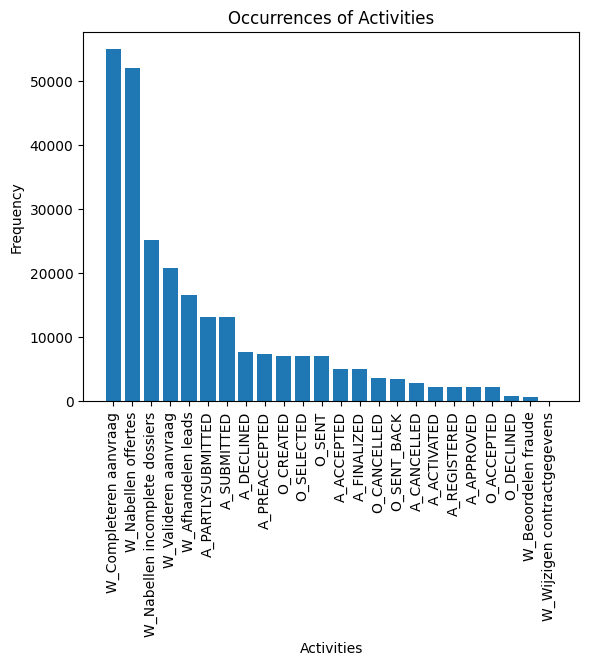

In [19]:
# Plot histgram of occurences of activits
plot_histogram_activity_occurrence(data)

Generating heatmap data: 100%|██████████| 13087/13087 [00:02<00:00, 6219.65it/s]


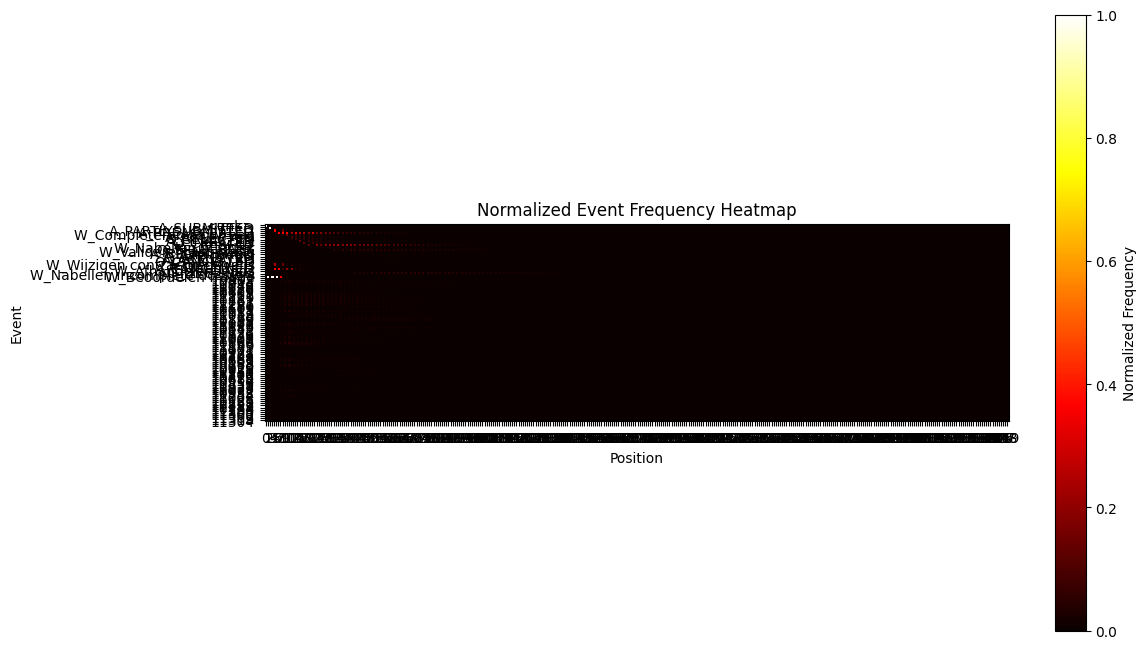

In [20]:

plot_heatmap(data, features)

### Process Mining Plots

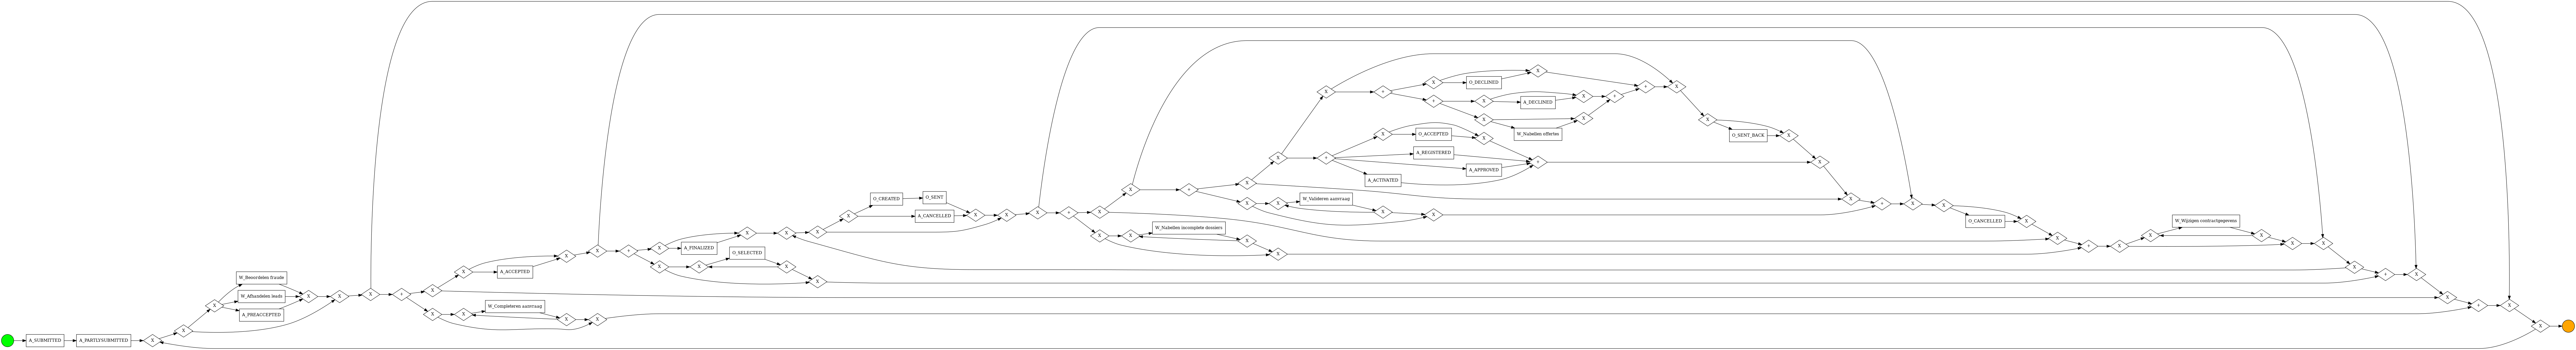

In [21]:
bpmn_map = plot_bpmn_map(data)

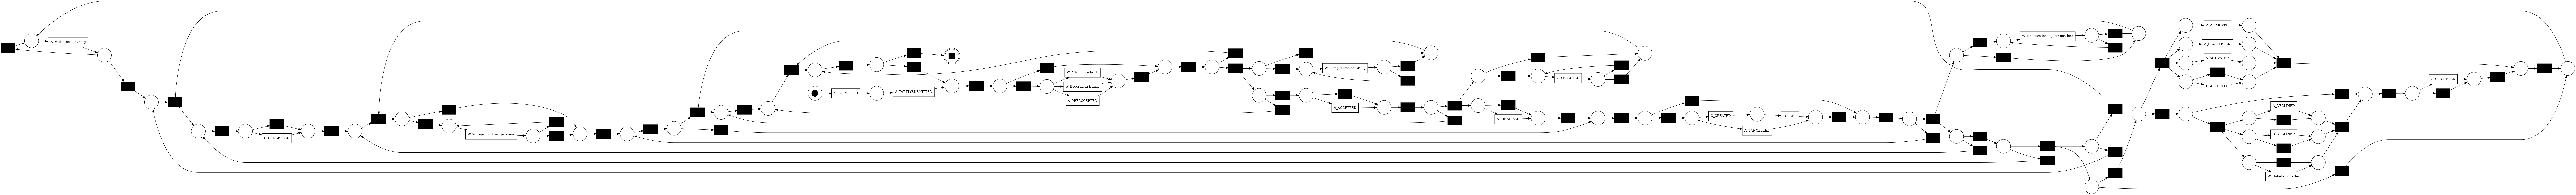

In [22]:
net, im, fm = plot_petri_net(bpmn_map)

/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


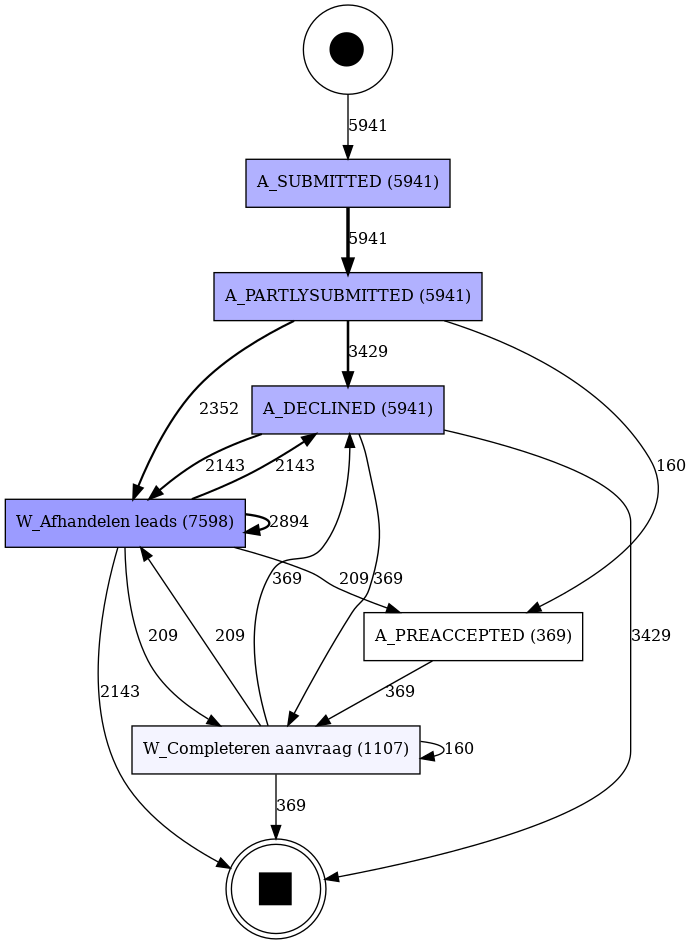

In [23]:
dfg, start_activites, end_activites = plot_dfg(data, num_variants = 5)

## BPI Challenge 2017

In [24]:
data = load_data(path_raw + 'BPI_Challenge_2017.xes.gz',['time:timestamp','case:concept:name','concept:name', 'org:resource'])

parsing log, completed traces :: 100%|██████████| 31509/31509 [00:48<00:00, 654.92it/s]
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-exp

In [25]:
print(data)

                         time:timestamp       case:concept:name  \
686058 2016-08-03 15:57:21.673000+00:00  Application_1000086665   
686059 2016-08-03 15:57:21.734000+00:00  Application_1000086665   
686060 2016-08-03 15:57:21.963000+00:00  Application_1000086665   
686061 2016-08-03 15:58:28.286000+00:00  Application_1000086665   
686062 2016-08-03 15:58:28.293000+00:00  Application_1000086665   
...                                 ...                     ...   
918295 2016-10-20 08:19:28.812000+00:00   Application_999993812   
918296 2016-10-20 08:21:59.667000+00:00   Application_999993812   
918297 2016-10-24 06:24:30.056000+00:00   Application_999993812   
918298 2016-10-24 06:24:30.059000+00:00   Application_999993812   
918299 2016-10-24 06:24:30.061000+00:00   Application_999993812   

                   concept:name org:resource  
686058     A_Create Application       User_1  
686059              A_Submitted       User_1  
686060           W_Handle leads       User_1  
686061 

### Explore the dataset

In [26]:
descriptive_statistics(data, features)

Number of activites:           1202267
Number of resources:           1202267
Unique activites:              175
Unique resources:              149
Number of cases:               31509
Unique processes:              15930
Maximum case length:           180
Minimum case length:           10
Average case length:           38.16
99.99% percentile:             155.69839999999385
99.00% percentile:             93.0
95.00% percentile:             70.0
75.00% percentile:             47.0
50.00% percentile:             35.0
25.00% percentile:             25.0
concept:name nan values:        0
org:resource nan values:        0
Variance of occurence counts:  232.66553243152083
Variance in process:           51.77062700501476


In [27]:
check_nan_traces(data, features)

Processing Arrays: 100%|██████████| 31509/31509 [00:00<00:00, 595995.04it/s]




No NaN values have been detected.


### Plots

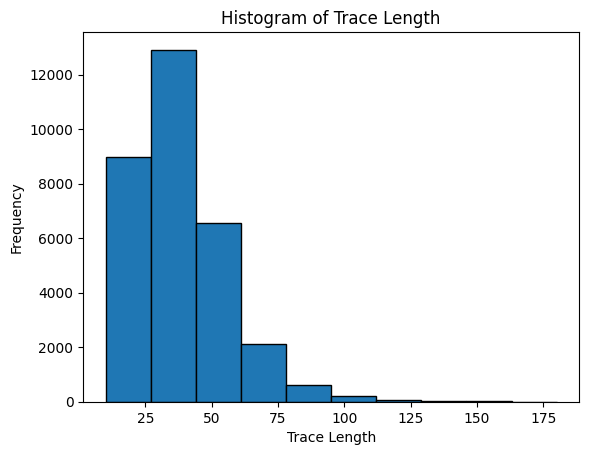

In [28]:
plot_histogram_trace_length(data)

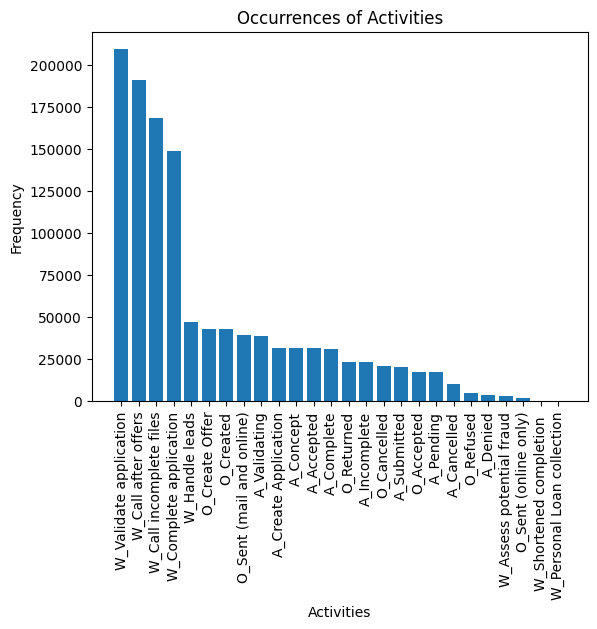

In [29]:
plot_histogram_activity_occurrence(data)

Generating heatmap data: 100%|██████████| 31509/31509 [00:12<00:00, 2560.09it/s]


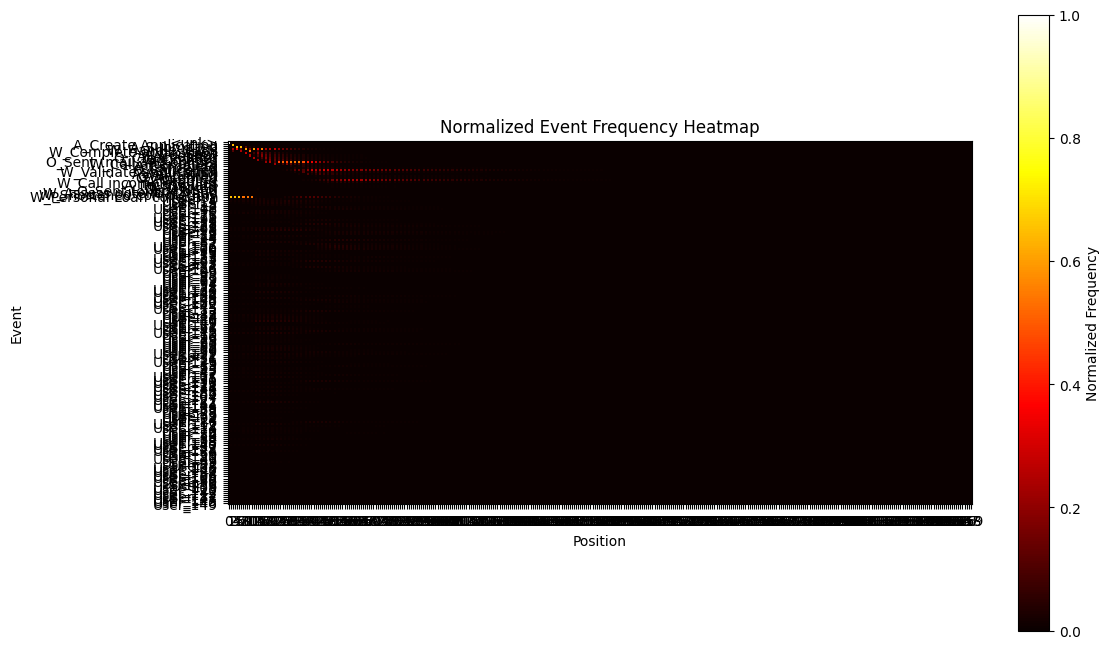

In [30]:
plot_heatmap(data, features)

### Process Mining Plots

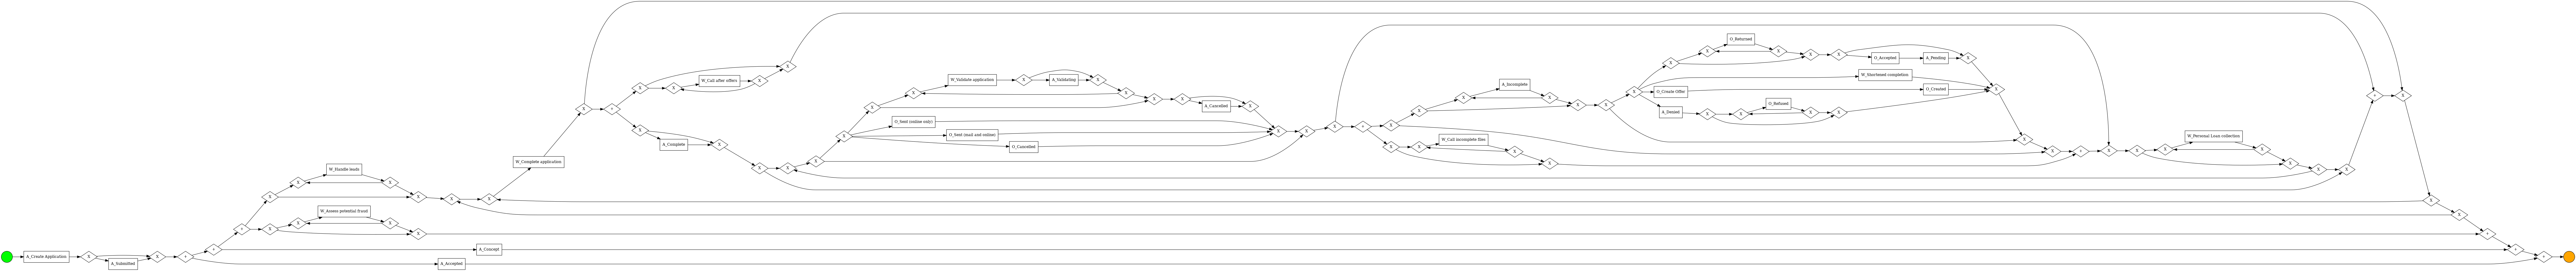

In [31]:
bpmn_map = plot_bpmn_map(data)

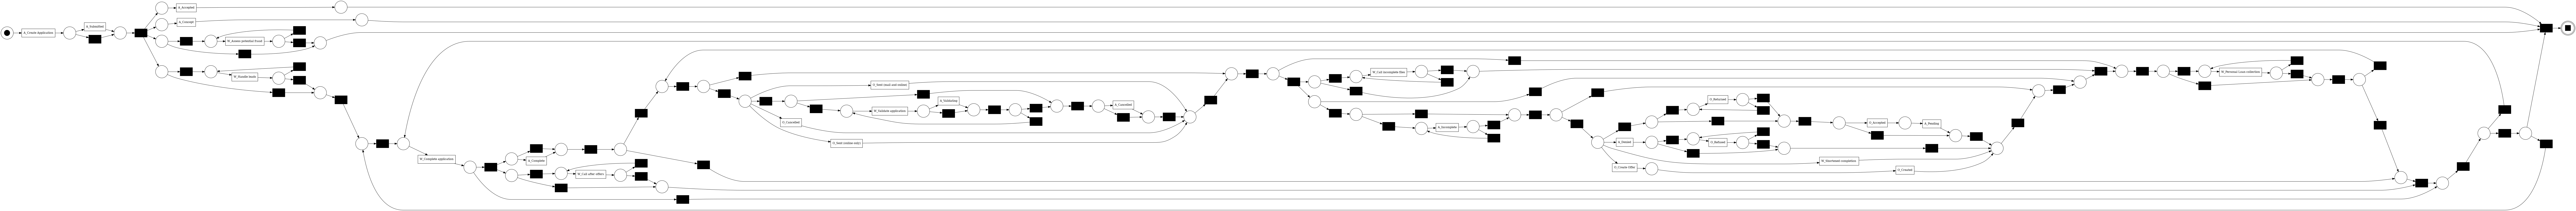

In [32]:
net, im, fm = plot_petri_net(bpmn_map)

/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


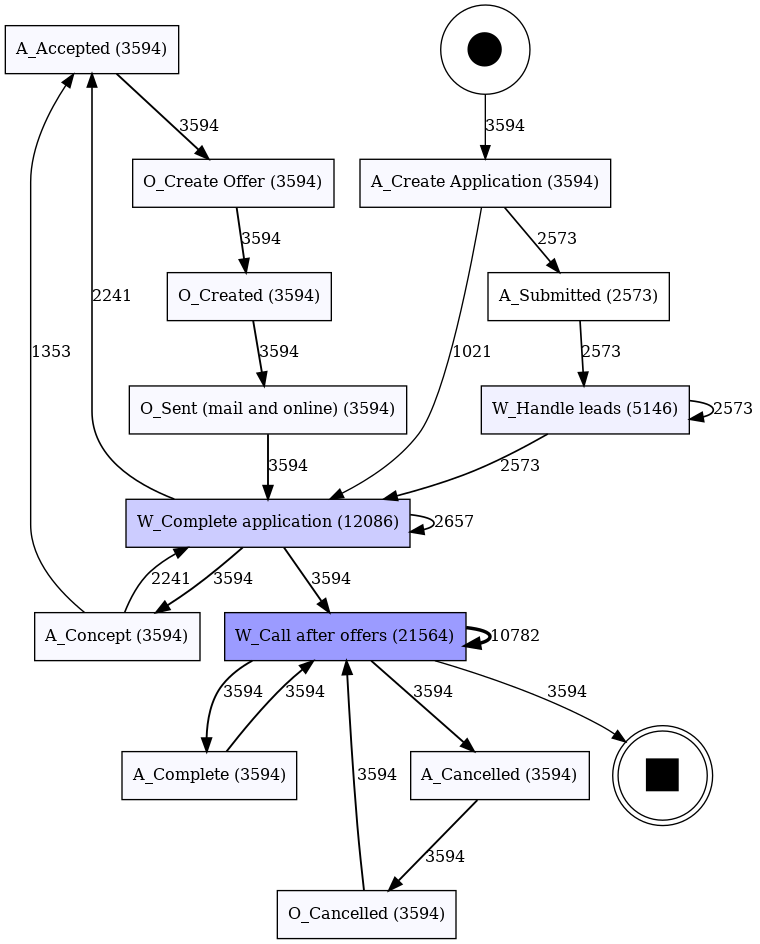

In [33]:
dfg, start_activites, end_activites = plot_dfg(data, num_variants = 5)

## BPI Challenge 2018

In [34]:
data = load_data(path_raw + 'BPI_Challenge_2018.xes.gz',['time:timestamp','case:concept:name','concept:name', 'org:resource'])

parsing log, completed traces :: 100%|██████████| 43809/43809 [03:01<00:00, 240.74it/s]
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-exp

In [35]:
print(data)

                         time:timestamp case:concept:name     concept:name  \
136988        2015-04-27 22:00:00+00:00  0002505cb62792e4      mail income   
136989        2015-05-03 22:00:00+00:00  0002505cb62792e4       mail valid   
136990        2015-05-03 22:00:00+00:00  0002505cb62792e4       mail valid   
136991        2015-05-03 22:00:00+00:00  0002505cb62792e4       mail valid   
136992        2015-06-12 09:50:18+00:00  0002505cb62792e4       initialize   
...                                 ...               ...              ...   
317369 2017-04-25 12:06:50.677000+00:00  fffadf8d083df3d5    begin editing   
317370 2017-04-25 12:06:57.959000+00:00  fffadf8d083df3d5        calculate   
317371 2017-04-25 12:07:08.236000+00:00  fffadf8d083df3d5  remove document   
317372 2017-04-25 12:07:14.577000+00:00  fffadf8d083df3d5  insert document   
317373 2017-04-25 12:07:21.285000+00:00  fffadf8d083df3d5             save   

                         org:resource  
136988                 

### Explore the dataset

In [36]:
descriptive_statistics(data, features)

Number of activites:           2514266
Number of resources:           2514266
Unique activites:              206
Unique resources:              165
Number of cases:               43809
Unique processes:              28489
Maximum case length:           2973
Minimum case length:           24
Average case length:           57.39
99.99% percentile:             779.622399999862
99.00% percentile:             170.0
95.00% percentile:             99.0
75.00% percentile:             59.0
50.00% percentile:             49.0
25.00% percentile:             44.0
concept:name nan values:        0
org:resource nan values:        0
Variance of occurence counts:  155.6229868139394
Variance in process:           119.27924725319245


In [37]:
check_nan_traces(data, features)

Processing Arrays: 100%|██████████| 43809/43809 [00:00<00:00, 456503.82it/s]




No NaN values have been detected.


### Plots

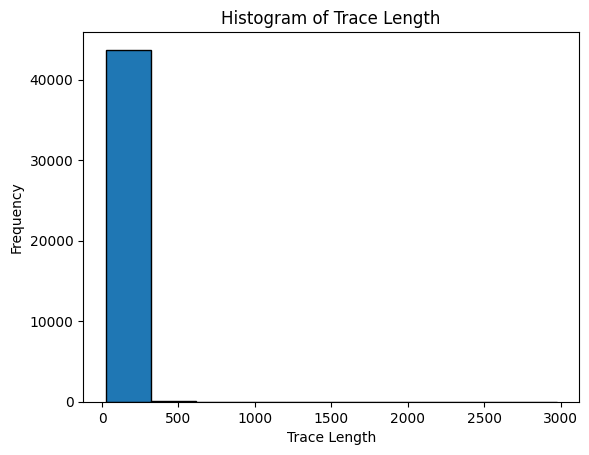

In [38]:
plot_histogram_trace_length(data)

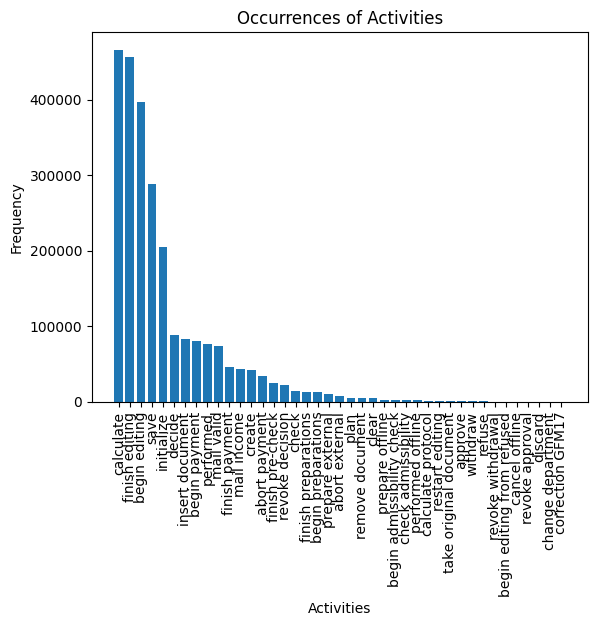

In [39]:
plot_histogram_activity_occurrence(data)

Generating heatmap data: 100%|██████████| 43809/43809 [00:27<00:00, 1621.56it/s]


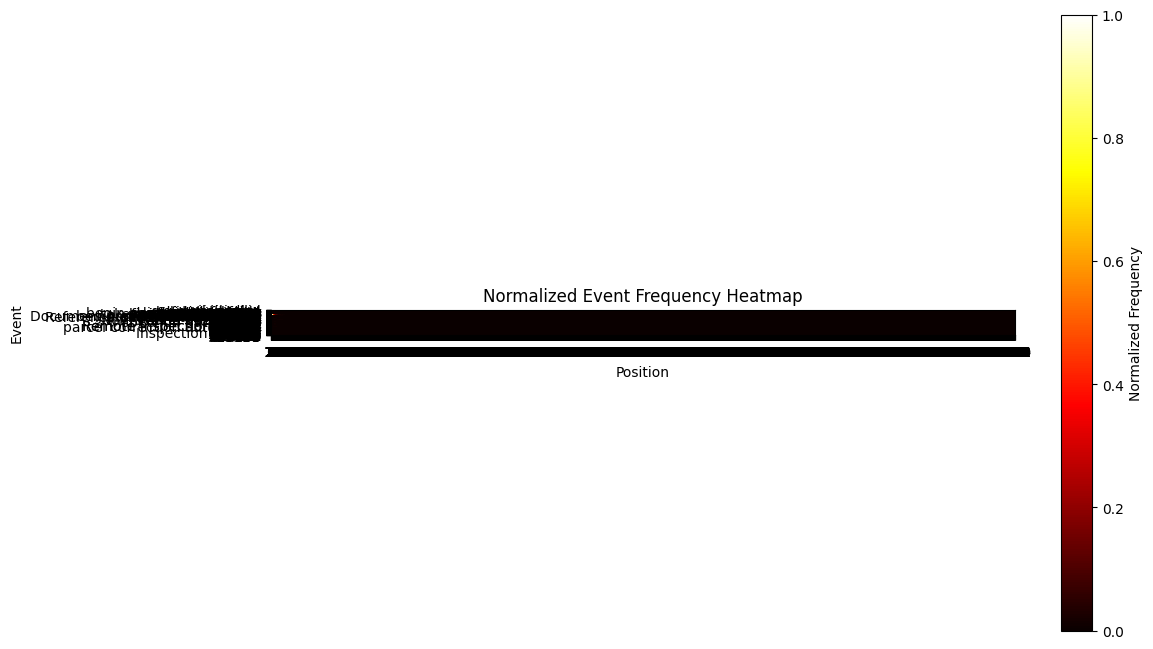

In [40]:
plot_heatmap(data, features)

### Process Mining Plots

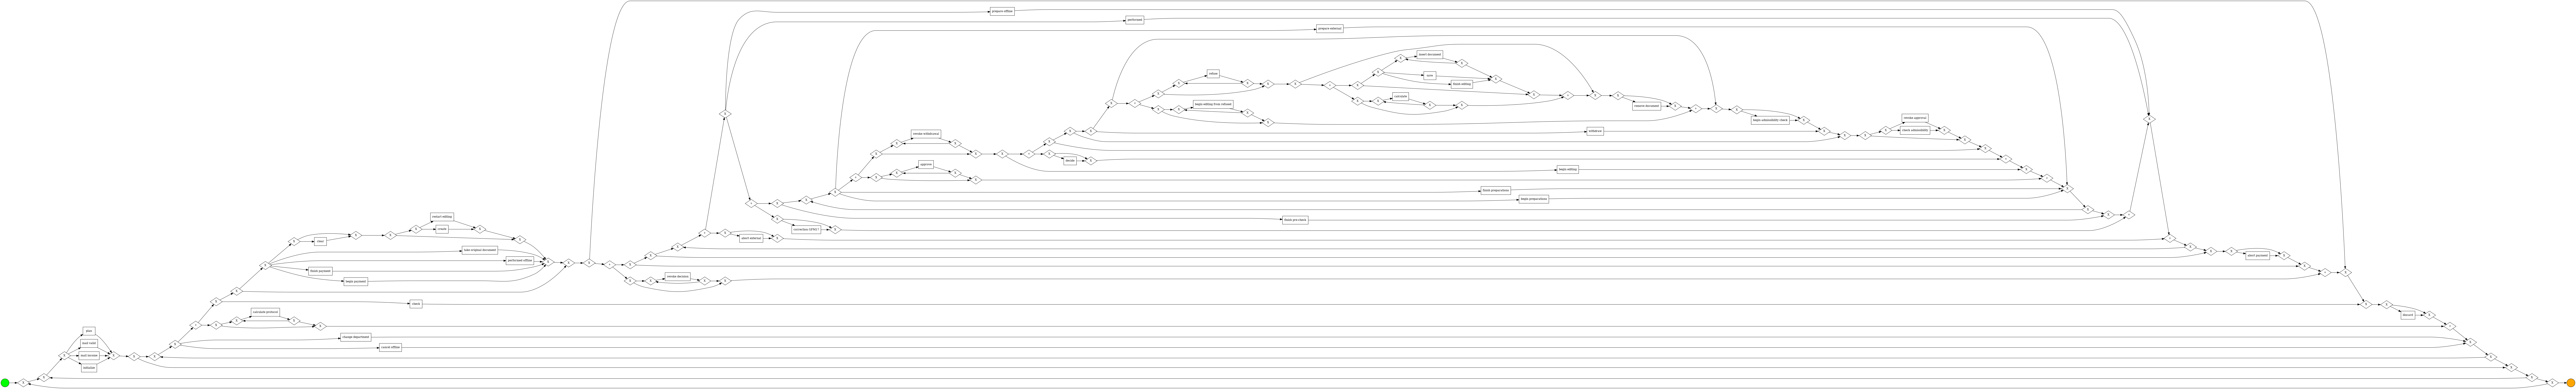

In [41]:
bpmn_map = plot_bpmn_map(data)

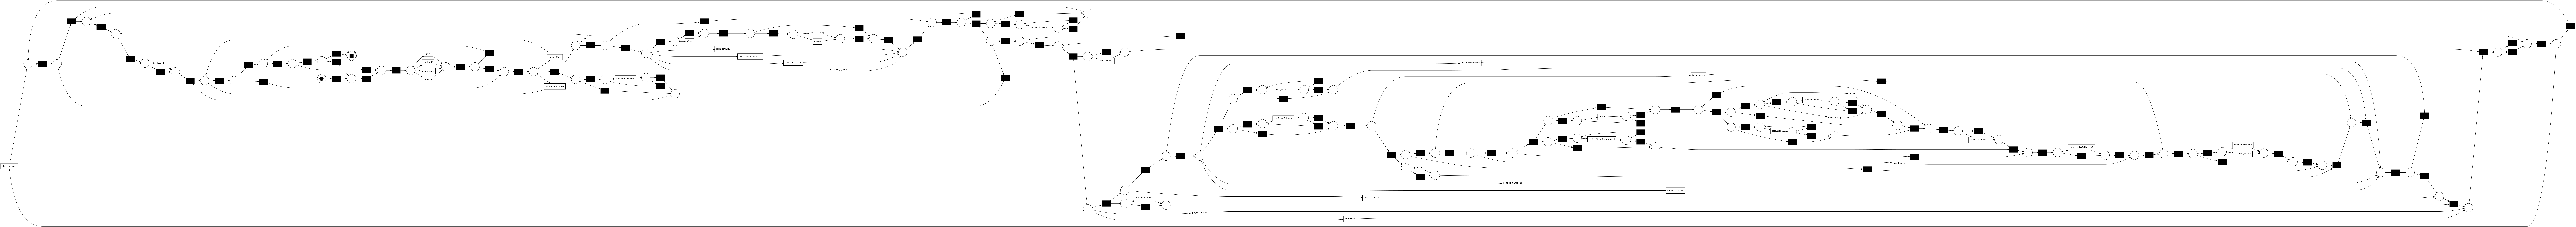

In [42]:
net, im, fm = plot_petri_net(bpmn_map)

/home/jupyter-sfaatz/env/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


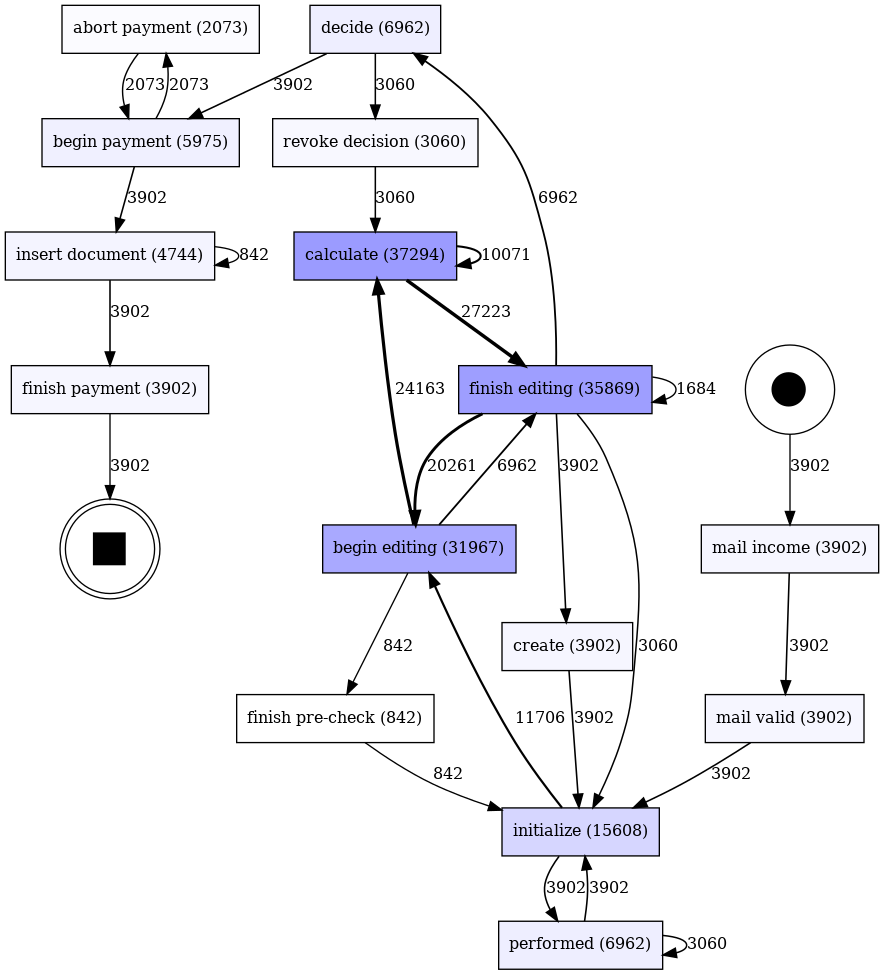

In [43]:
dfg, start_activites, end_activites = plot_dfg(data, num_variants = 5)

## BPI Challenge 2019

In [ ]:
data = load_data(path_raw + 'BPI_Challenge_2019.xes',['time:timestamp','case:concept:name','concept:name', 'org:resource'])

parsing log, completed traces ::  61%|██████    | 153019/251734 [00:40<00:19, 5153.19it/s]

In [ ]:
print(data)

### Explore the dataset

In [ ]:
descriptive_statistics(data, features)

In [ ]:
check_nan_traces(data, features)

### Plots

In [ ]:
plot_histogram_trace_length(data)

In [ ]:
plot_histogram_activity_occurrence(data)

In [ ]:
plot_heatmap(data, features)

### Process Mining Plots

In [ ]:
bpmn_map = plot_bpmn_map(data)

In [ ]:
net, im, fm = plot_petri_net(bpmn_map)

In [ ]:
dfg, start_activites, end_activites = plot_dfg(data, num_variants = 5)